In [3]:
# Required libraries
import tensorflow as tf
import os
import numpy as np 
from matplotlib import pyplot as plt
import cv2

# Tensor flow and keras libraries
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D #images are 2D, videos are 3D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


2023-05-13 13:47:42.668533: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-13 13:47:42.736023: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-13 13:47:42.737160: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-13 13:47:45.412188: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:

for dirname, _, filenames in os.walk("/home/bkha0016/Documents/monash/PROJECT/input/data"):
    for filename in filenames:
        #joining one or more path ()
        os.path.join(dirname, filename)


<h2>DATA EXPLORATION</h2>

<b>Malignant Skin Cancer</b>

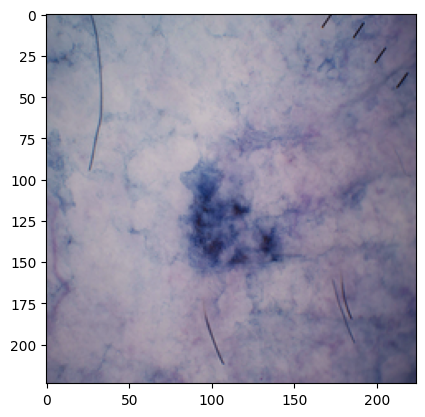

In [4]:
# Reads in RGB format (while open cv reads in BGR format) --> turns image color into blueish
plt.imshow(cv2.imread("/home/bkha0016/Documents/monash/PROJECT/input/data/test/malignant/1027.jpg"))

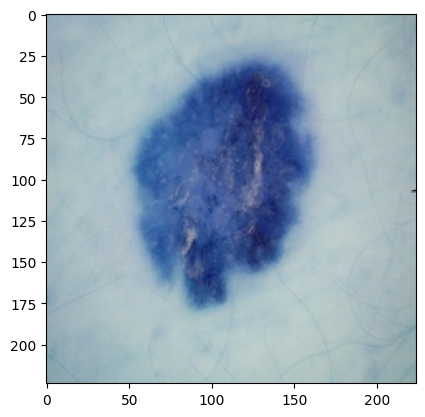

In [6]:
plt.imshow(cv2.imread("/home/bkha0016/Documents/monash/PROJECT/input/data/train/malignant/101.jpg"))

<b>Benign Skin Cancer</b>


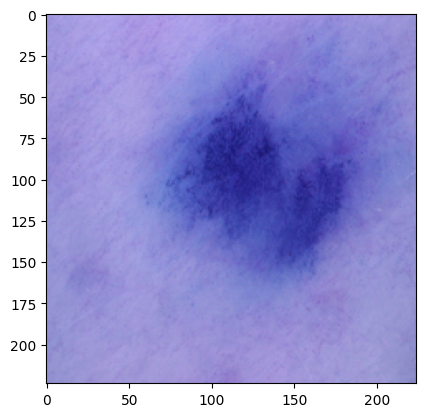

In [8]:
plt.imshow(cv2.imread("/home/bkha0016/Documents/monash/PROJECT/input/data/train/benign/101.jpg"))

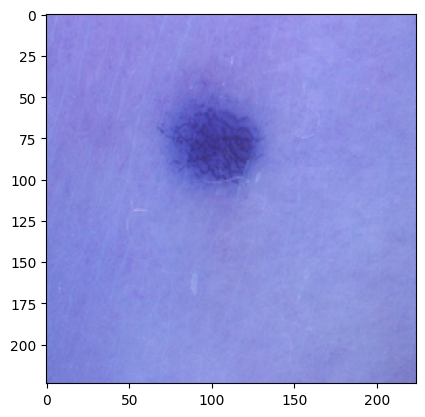

In [9]:
plt.imshow(cv2.imread("/home/bkha0016/Documents/monash/PROJECT/input/data/train/benign/1041.jpg"))

<h2>Data Preparation</h2>

In [10]:
image_size = 224
trainGen = ImageDataGenerator(rescale = 1./255,
                              shear_range = 0.2,
                              zoom_range = 0.2,
                              horizontal_flip = True)

trainSet = trainGen.flow_from_directory("/home/bkha0016/Documents/monash/PROJECT/input/data/train",
                                        target_size = (image_size, image_size),
                                        batch_size = 2,
                                        class_mode = 'binary')



Found 2637 images belonging to 2 classes.


In [11]:
image_size = 224
testGen = ImageDataGenerator(rescale = 1./255,
                              shear_range = 0.2,
                              zoom_range = 0.2,
                              horizontal_flip = True)

# change the class_mode into sparse for multiclass classification (beinign, malignannt, normal skin)
# batch size significantly determines the accuracy of your model, higher batch size the better but it will destroy your CPU (consult with a professional)
testSet = testGen.flow_from_directory("/home/bkha0016/Documents/monash/PROJECT/input/data/test",
                                        target_size = (image_size, image_size),
                                        batch_size = 2,
                                        class_mode = 'binary')



Found 660 images belonging to 2 classes.


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),strides=(1, 1),activation='relu',padding='same', input_shape=(224, 224, 3)), 
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(64,(3,3),strides=(1, 1) ,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(256,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

2023-05-13 10:40:53.939044: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-13 10:40:53.941639: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [15]:
# epochs does not matter that much stick with one or two should be fine (validation testing)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(trainSet, validation_data=testSet, epochs=2)

Epoch 1/2


2023-05-13 10:52:32.827863: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1319/1319 [==============================] - 527s 397ms/step - loss: 0.6899 - accuracy: 0.5400 - val_loss: 0.6895 - val_accuracy: 0.5455
Epoch 2/2
1319/1319 [==============================] - 524s 397ms/step - loss: 0.6918 - accuracy: 0.5457 - val_loss: 0.6890 - val_accuracy: 0.5455


<h2>Prediction</h2>
<b>Malignant Tumor</b>

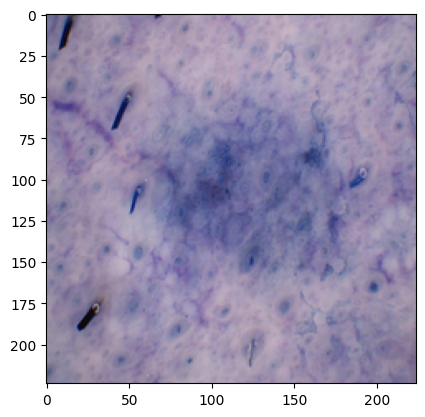

In [17]:
plt.imshow(cv2.imread("/home/bkha0016/Documents/monash/PROJECT/input/data/test/malignant/1135.jpg"))

In [21]:
import numpy as np
import keras.utils as image # OLD API doesnt work anymore

test_image = image.load_img('/home/bkha0016/Documents/monash/PROJECT/input/data/test/malignant/1135.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
trainSet.class_indices
print(result)
if result[0]==1:
    print("You have malignant Skin cancer")
else:
    print("You have benign(Not harmful) Skin cancer")

1/1 [==============================] - 1s 895ms/step
[[0.43111286]]
You have benign(Not harmful) Skin cancer


<b>Benign Tumor</b>

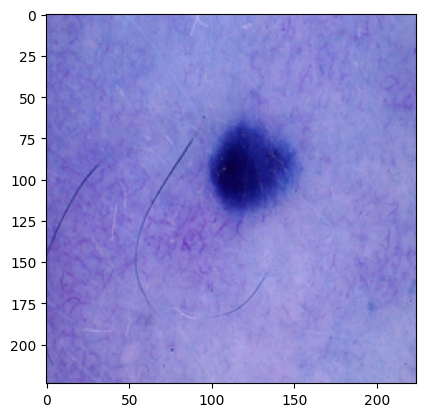

In [4]:
plt.imshow(cv2.imread("/home/bkha0016/Documents/monash/PROJECT/input/data/test/benign/1118.jpg"))

In [23]:
import numpy as np
import keras.utils as image

test_image = image.load_img('/home/bkha0016/Documents/monash/PROJECT/input/data/test/benign/1118.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
trainSet.class_indices
print(result)
if result[0]==1:
    print("You have malignant Skin cancer")
else:
    print("You have benign(Not harmful) Skin cancer")

1/1 [==============================] - 0s 52ms/step
[[0.41131696]]
You have benign(Not harmful) Skin cancer
